(1) Make a plot of the standard normal curve on the interval [-4, 4]. Give the plot a title "Standard normal curve", an x label of "Normal deviate" and a y label of "Density".

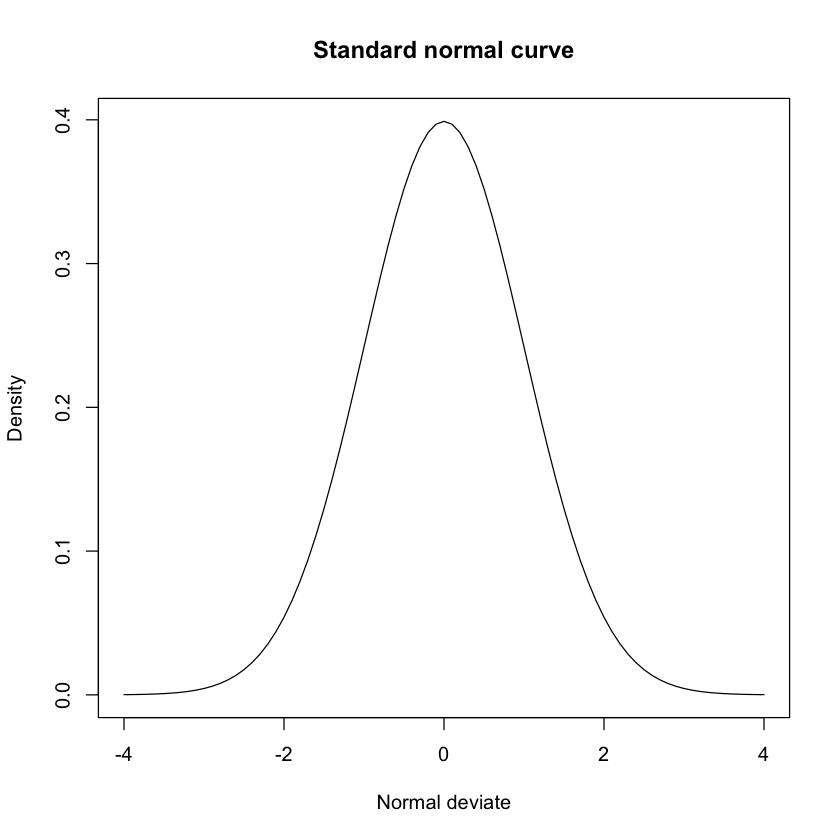

In [11]:
x <- pretty(-4:4, n=100)
y <- dnorm(x)
plot(x, y, type="l", main="Standard normal curve", xlab="Normal deviate", ylab="Density")

(2) What is the area under the curve to the right of x=3? In other words, what is the probability of drawing a random number from the normal distribution that is 3 standard deviations or more larger than the mean?

In [13]:
1 - pnorm(3)

[1] 0.001349898

(3) If the expression valuse for a gene are normally distributed with mean 10 and standard deviation 2, what is the value of a gene at the 95th percentile?

In [14]:
qnorm(0.95, mean=10, sd=2)

[1] 13.28971

Generate 50 numbers from a normal distribtuion with mean=10 and sd=2. Now trnaform this vector so that the numbers have a stnadard normal distribtuion with mean=0 and sd=1.

In [15]:
x <- rnorm(50, 10, 2)
z <- (x - mean(x))/sd(x)

(4) A t-test with 6 degrees of freedom has a score of 3.5. Using only the dt, pt, qt or rt probability functions, what is the p-value if this was a two-sided test? Recall that a p-value is the probailty of seeing a value as extreme or more extreme than the observed score, assuming the score was drawn from the specified distirbution.

In [19]:
2*(1 - pt(3.5, df = 6))

[1] 0.01282634

(5) Draw 1 million random numbers from the t-distirbution with 6 degrees of freedom. How many times is the numbr less than -3.5 or greater than 3.5? 

In [21]:
x <- rt(100000, df=6)
sum(abs(x) > 3.5)

[1] 1238

(6) Find the mean value of all numeric variables for the mtcars data, grouping by number of gears and automtatic or manual transmission. (Hint: Use the aggregate function)

In [24]:
with(mtcars, aggregate(mtcars, by=list(gear=gear, transmission=am), FUN=mean))

,gear,transmission,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,3,0,16.10667,7.466667,326.3,176.1333,3.132667,3.8926,17.692,0.2,0,3,2.666667
2,4,0,21.05,5,155.675,100.75,3.8625,3.305,20.025,1,0,4,3
3,4,1,26.275,4.5,106.6875,83.875,4.13375,2.2725,18.435,0.75,1,4,2
4,5,1,21.38,6,202.48,195.6,3.916,2.6326,15.64,0.2,1,5,4.4


In [80]:
library(plyr)
library(reshape2)
data(airquality)

Warning message:
: package ‘plyr’ was built under R version 3.1.3

In [43]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


(7) Use `melt` to convert the airquality dataframe into a "tall" format using Month and Day as teh id variables, saving it as a new datafrmae. Print the first 6 rows.

In [45]:
md <- melt(airquality, id=c("Month", "Day"))
head(md)

,Month,Day,variable,value
1,5,1,Ozone,41
2,5,2,Ozone,36
3,5,3,Ozone,12
4,5,4,Ozone,18
5,5,5,Ozone,NA
6,5,6,Ozone,28


(8) Find the avarage values of Ozone, Solar.R, Wind and Temp for each month using `dcast`. Hint: Give an extra argument `na.rm = TRUE` to ignore missing data.

In [76]:
dcast(md, Month ~ variable, mean, na.rm = TRUE)

,Month,Ozone,Solar.R,Wind,Temp
1,5,23.61538,181.2963,11.62258,65.54839
2,6,29.44444,190.1667,10.26667,79.1
3,7,59.11538,216.4839,8.941935,83.90323
4,8,59.96154,171.8571,8.793548,83.96774
5,9,31.44828,167.4333,10.18,76.9


(9) Find the avarage values of Ozone, Solar.R, Wind and Temp for each month using `dcast`, but only for the first 2 weeks of each month. Hint: Give an extra argument `na.rm = TRUE` to ignore missing data. Hint: Use the subset argument.

In [82]:
dcast(md, Month ~ variable, mean, subset = .(Day < 15), na.rm = TRUE)

,Month,Ozone,Solar.R,Wind,Temp
1,5,19.41667,200.0909,11.17857,66.28571
2,6,40.5,249.1429,10.73571,82.85714
3,7,64.81818,228.7143,9.007143,84.85714
4,8,58.41667,168.7273,8.721429,85.5
5,9,43.35714,188.6429,9.407143,82.21429


**Questions below use the day.1 and day.2 dataframes**

In [111]:
set.seed(123)
pid.1 <- c(1,1,2,2)
gid.1 <- c(1,2,1,2)
val.1 <- rnorm(4)
day.1 <- data.frame(pid=pid.1, gid=gid.1, val=val.1)

pid.2 <- c(1,1,2,2)
gid.2 <- c(1,2,1,2)
val.2 <- 1 + rnorm(4)
day.2 <- data.frame(pid=pid.2, gid=gid.2, val=val.2)

In [112]:
day.1

,pid,gid,val
1,1,1,-0.5604756
2,1,2,-0.2301775
3,2,1,1.558708
4,2,2,0.07050839


In [113]:
day.2

,pid,gid,val
1,1,1,1.129288
2,1,2,2.715065
3,2,1,1.460916
4,2,2,-0.2650612


(10) Suppose day.1 and day.2 are results from experiments performed on differnet days. Merge the data from day.1 and day.2 into a single dataframe caleld `days` to combine the data sets.

In [117]:
days <- merge(day.1, day.2, by=c("pid", "gid"), suffixes = 1:2)

In [118]:
days

,pid,gid,val1,val2
1,1,1,-0.5604756,1.129288
2,1,2,-0.2301775,2.715065
3,2,1,1.558708,1.460916
4,2,2,0.07050839,-0.2650612


(11) Sort the `days` dataframe by val1 in decreasing order.

In [120]:
days[order(-days$val1),]

,pid,gid,val1,val2
3,2,1,1.558708,1.460916
4,2,2,0.07050839,-0.2650612
2,1,2,-0.2301775,2.715065
1,1,1,-0.5604756,1.129288


In [ ]:
(12) Remove duplicate rows from the following dataframe.

In [124]:
df <- read.csv("df.csv")
df

,pid,gid,val1,val2
1,1,1,-0.5604756,1.129288
2,1,1,-0.5604756,1.129288
3,1,2,-0.2301775,2.715065
4,2,2,0.07050839,-0.2650612
5,2,2,0.07050839,-0.2650612
6,2,1,1.558708,1.460916


In [125]:
unique(df)

,pid,gid,val1,val2
1,1,1,-0.5604756,1.129288
3,1,2,-0.2301775,2.715065
4,2,2,0.07050839,-0.2650612
6,2,1,1.558708,1.460916
